# AMPSphere v.2022-03

This is a notebook meant to form the set of notebooks used to analyze the data in AMPSphere and write the manuscript:

__AMPSphere: Global survey of prokaryotic antimicrobial peptides shaping microbiomes__

Figures generated in this script formed the panel shown in Figure S3.

### Validation of clustering procedure for c_AMPs

c_AMPs were converted to a 8-letter alphabet, then were hierarchically clustered using CD-Hit at three levels: 100%, 85% and 75% of identity. To make the validation, we sampled 1000 sequences in triplicate, aligned them against the cluster representative and calculated the E-value of the alignment.

In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log

In [2]:
# load data
lv1 = pd.read_table('data/output_clustering_significance_levelI.tsv.gz')
lv2 = pd.read_table('data/output_clustering_significance_levelII.tsv.gz')
lv3 = pd.read_table('data/output_clustering_significance_levelIII.tsv.gz')

In [3]:
# preparing variables
lv1['min_id'] = lv1[['identity', 'gap_identity']].min(axis=1)
lv2['min_id'] = lv2[['identity', 'gap_identity']].min(axis=1)
lv3['min_id'] = lv3[['identity', 'gap_identity']].min(axis=1)

lv1['Log(E-value)'] = lv1.evalue.apply(lambda x: log(x, 10))
lv2['Log(E-value)'] = lv2.evalue.apply(lambda x: log(x, 10))
lv3['Log(E-value)'] = lv3.evalue.apply(lambda x: log(x, 10))

In [4]:
# calculating the proportion of significant 
# alignments in each cluster level
pct1 = len(lv1[lv1['Log(E-value)'] <= -5]) * 100 / len(lv1) 
pct2 = len(lv2[lv2['Log(E-value)'] <= -5]) * 100 / len(lv2) 
pct3 = len(lv3[lv3['Log(E-value)'] <= -5]) * 100 / len(lv3)

pct1, pct2, pct3 = [round(pct1, 1),
                    round(pct2, 1),
                    round(pct3, 1)]
    
cl = {1: ['I', pct1],
      2: ['II', pct2],
      3: ['III', pct3]}

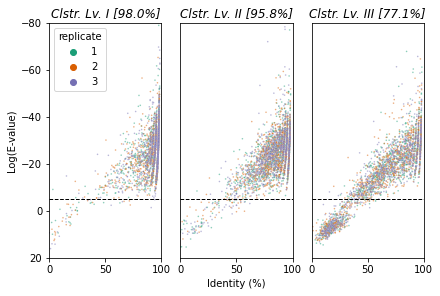

In [5]:
# plotting
fig, axarr = plt.subplot_mosaic([['a)', 'b)', 'c)']],
                                constrained_layout=True)

sns.scatterplot(ax=axarr['a)'],
                data=lv1,
                x='min_id',
                y='Log(E-value)',
                hue='replicate',
                s=2.5,
                alpha=0.5,
                palette='Dark2')

sns.scatterplot(ax=axarr['b)'],
                data=lv2,
                x='min_id',
                y='Log(E-value)',
                hue='replicate',
                s=2.5, alpha=0.5,
                legend=False,
                palette='Dark2')

sns.scatterplot(ax=axarr['c)'],
                data=lv3,
                x='min_id',
                y='Log(E-value)',
                hue='replicate',
                s=2.5,
                alpha=0.5,
                legend=False,
                palette='Dark2')

# fine tunning
for idx, (label, ax) in enumerate(axarr.items()):
    level, pct = cl[idx+1]
    ax.set_title(f'Clstr. Lv. {level} [{pct}%]', fontfamily='Sans Serif', fontstyle='italic')
    ax.axhline(y=log(1e-5, 10), color='black', linestyle='dashed', linewidth=1.0)
    ax.set_xlabel('Identity (%)')
    ax.set_xlim(0, 100)
    ax.set_ylim(20, -80)
    if idx > 0:
        ax.set_ylabel(None)
        ax.set_yticks([])
    if idx != 1:
        ax.set_xlabel(None)